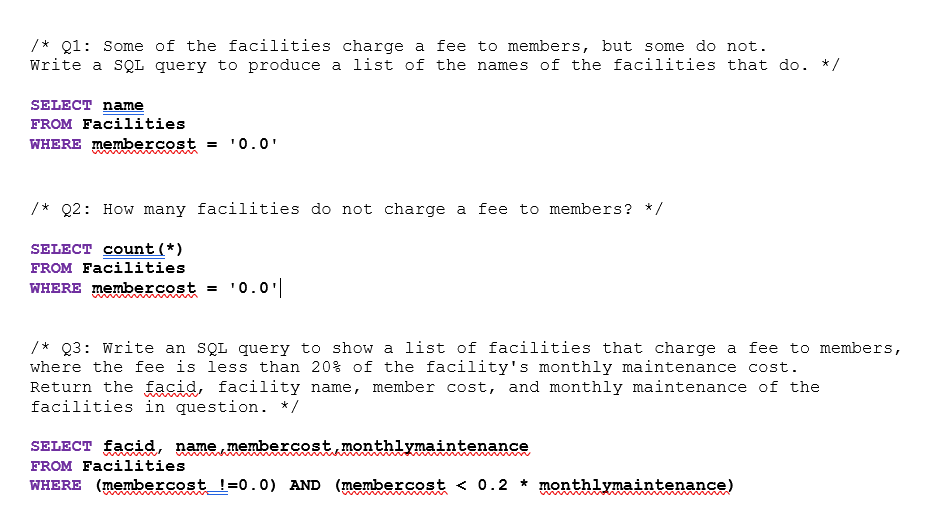
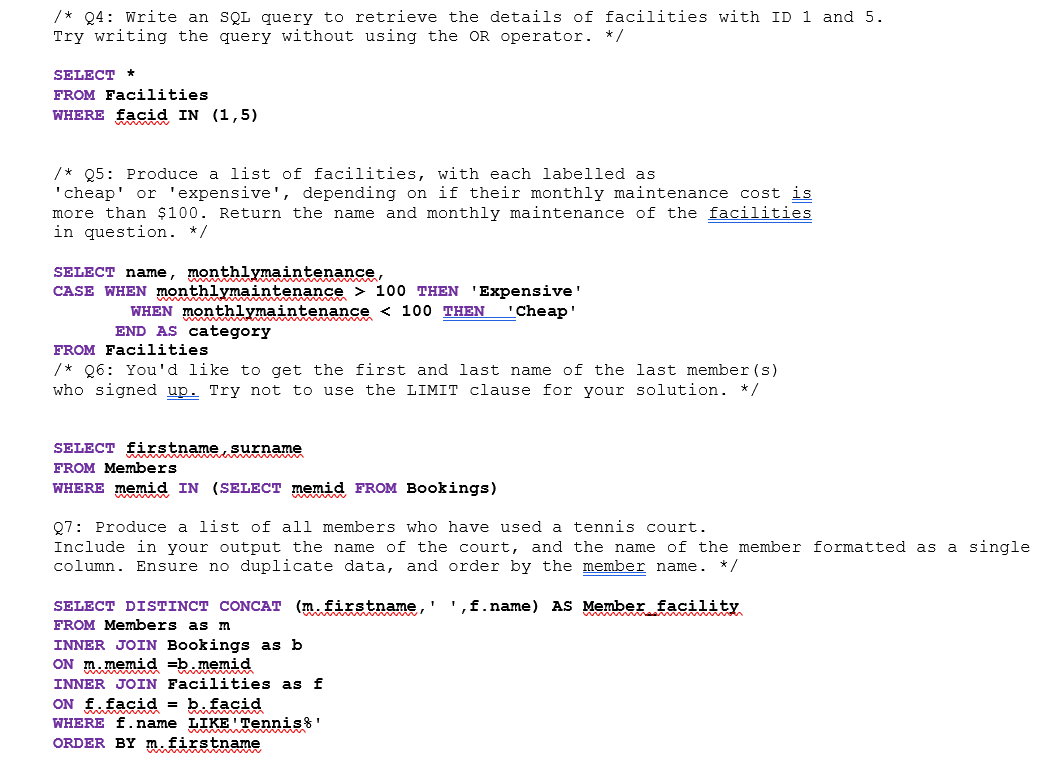


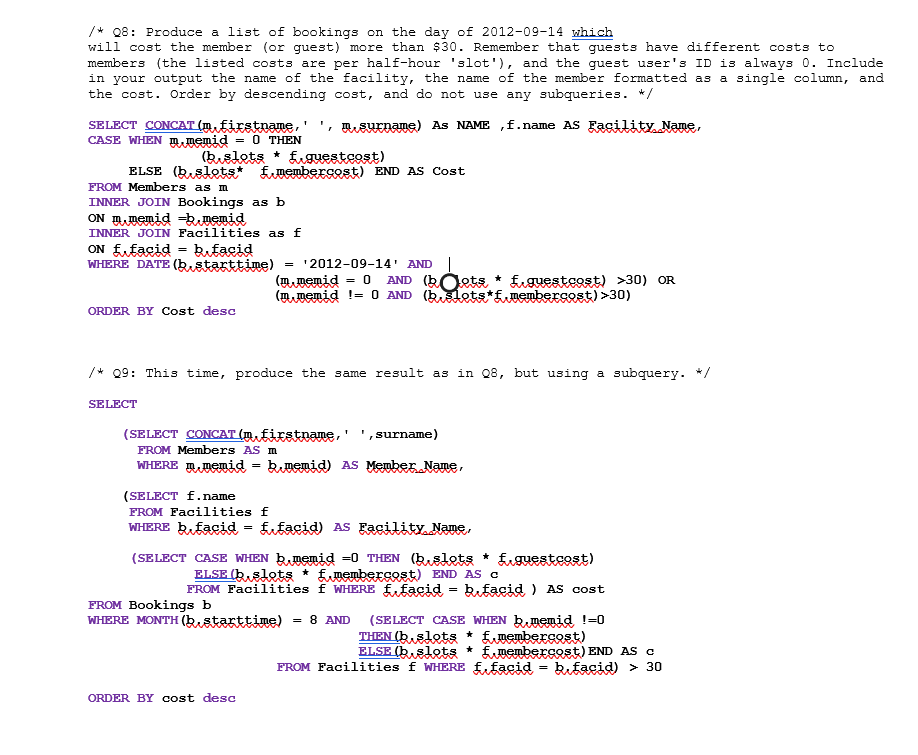

In [1]:
import sqlite3 as sql

import pandas as pd

In [2]:
con = sql.connect('C:/Users/Gayathri/Desktop/sqlite_db_pythonsqlite.db')

In [3]:
rs = con.execute('select * from Bookings')

**Q10: Produce a list of facilities with a total revenue less than 1000.<br/>
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members!**


In [30]:
query = """ 

SELECT f.name AS Facility_Name, 
SUM(b.slots* CASE WHEN b.memid = 0 THEN f.guestcost
ELSE (b.slots*  f.membercost) END) AS Revenue

FROM Facilities AS f
INNER JOIN Bookings as b ON f.facid = b.facid

GROUP BY f.name
HAVING SUM(b.slots* CASE WHEN b.memid = 0 THEN f.guestcost
              ELSE (b.slots*  f.membercost) END) > 1000
ORDER BY Revenue DESC
"""

In [31]:
rs=con.execute(query)

In [32]:
result =pd.DataFrame(rs.fetchall())

In [34]:
result.columns = ['Facility Name','Revenue']

In [35]:
result

,Facility Name,Revenue
0,Massage Room 1,60766.4
1,Tennis Court 2,24840.0
2,Tennis Court 1,24510.0
3,Squash Court,15351.0
4,Massage Room 2,14989.2
5,Badminton Court,1906.5


**Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order**



In [38]:
query = """ 
SELECT a.firstname|| ' '||a.surname AS Member_Name, b.firstname ||' '||b.surname AS Recommended_by 
FROM Members as a
INNER JOIN Members as b
ON a.recommendedby = b.memid
WHERE a.recommendedby IS NOT NULL
"""

In [39]:
rs=con.execute(query)

In [40]:
result =pd.DataFrame(rs.fetchall())
result.columns =['Member Name','Recommended By']

In [41]:
result

,Member Name,Recommended By
0,Janice Joplette,Darren Smith
1,Gerald Butters,Darren Smith
2,Nancy Dare,Janice Joplette
3,Tim Boothe,Tim Rownam
4,Ponder Stibbons,Burton Tracy
5,Charles Owen,Darren Smith
6,David Jones,Janice Joplette
7,Anne Baker,Ponder Stibbons
8,Jack Smith,Darren Smith
9,Florence Bader,Ponder Stibbons


**Q12: Find the facilities with their usage by member, but not guests**


In [42]:
query = """
select f.name, count(b.memid) AS Facility_usage from Facilities as f
INNER JOIN Bookings as b
on f.facid = b.facid
WHERE b.memid !=0
GROUP BY f.name
"""


In [43]:
rs=con.execute(query)

In [44]:
result =pd.DataFrame(rs.fetchall())
result.columns =['Facility_Name','Facility_usage']

In [45]:
result

,Facility_Name,Facility_usage
0,Badminton Court,344
1,Massage Room 1,421
2,Massage Room 2,27
3,Pool Table,783
4,Snooker Table,421
5,Squash Court,195
6,Table Tennis,385
7,Tennis Court 1,308
8,Tennis Court 2,276


**Q13: Find the facilities usage by month, but not guests**



In [48]:
query = """
select strftime('%m',b.starttime) AS monthly,count(b.memid) AS Facility_usage from Facilities as f
INNER JOIN Bookings as b
on f.facid = b.facid
WHERE b.memid !=0
GROUP BY monthly
"""

In [49]:
rs = con.execute(query)

In [50]:
result = pd.DataFrame(rs.fetchall())
result.columns = ['Monthly','Facility Usage']

In [51]:
result

,Monthly,Facility Usage
0,07,480
1,08,1168
2,09,1512
